#Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  os
import seaborn as sns


# LOADNG DATASETS


In [4]:
data=pd.read_csv('/content/drive/MyDrive/suicide_attacks.csv')


In [5]:
data.head()

,groups,claim,status,statistics.sources,date.year,date.month,date.day,statistics.# wounded_low,statistics.# wounded_high,statistics.# killed_low,...,target.latitude,target.longtitude,target.desc,target.type,target.nationality,statistics.# attackers,statistics.# female_attackers,statistics.# male_attackers,statistics.# unknown_attackers,attacker.gender
0,Islamic State,Suspected,Confirmed Suicide,2,2015,6,2,8,8,5,...,36.483333,40.75,Syrian Army checkpoint,Security,Syrian,1,0,0,1,Unknown
1,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
2,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
3,Unknown Group,Unclaimed,Confirmed Suicide,4,2004,10,5,10,15,1,...,33.340000,44.40,Iraqi Police patrol,Security,Iraqi,1,0,0,1,Unknown
4,Taliban (IEA),Claimed,Possible - Conflicting Reports,5,2017,7,4,2,2,0,...,31.820000,64.54,Afghan soldiers at security checkpoint,Security,Afghan,1,0,0,1,Unknown


In [6]:
data.describe


<bound method NDFrame.describe of                       groups      claim                          status  \
0              Islamic State  Suspected               Confirmed Suicide   
1              Islamic State  Suspected      Possible - Too Few Sources   
2              Islamic State  Suspected      Possible - Too Few Sources   
3              Unknown Group  Unclaimed               Confirmed Suicide   
4              Taliban (IEA)    Claimed  Possible - Conflicting Reports   
...                      ...        ...                             ...   
10013          Unknown Group  Unclaimed      Possible - Too Few Sources   
10014  Islamic State of Iraq    Claimed      Possible - Too Few Sources   
10015  Islamic State of Iraq    Claimed      Possible - Too Few Sources   
10016          Unknown Group  Unclaimed               Confirmed Suicide   
10017          Unknown Group  Unclaimed               Confirmed Suicide   

       statistics.sources  date.year  date.month  date.day  \
0  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   groups                              10018 non-null  object 
 1   claim                               10018 non-null  object 
 2   status                              10018 non-null  object 
 3   statistics.sources                  10018 non-null  int64  
 4   date.year                           10018 non-null  int64  
 5   date.month                          10018 non-null  int64  
 6   date.day                            10018 non-null  int64  
 7   statistics.# wounded_low            10018 non-null  int64  
 8   statistics.# wounded_high           10018 non-null  int64  
 9   statistics.# killed_low             10018 non-null  int64  
 10  statistics.# killed_high            10018 non-null  int64  
 11  statistics.# killed_low_civilian    10018

In [8]:
data.shape,data.size

((10018, 39), 390702)

# Removing the null values

In [27]:
#Before Removing bull values

data.notnull().sum()


groups                                10018
claim                                 10018
status                                10018
statistics.sources                    10018
date.year                             10018
date.month                            10018
date.day                              10018
statistics.# wounded_low              10018
statistics.# wounded_high             10018
statistics.# killed_low               10018
statistics.# killed_high              10018
statistics.# killed_low_civilian      10018
statistics.# killed_high_civilian     10018
statistics.# killed_low_political     10018
statistics.# killed_high_political    10018
statistics.# killed_low_security      10018
statistics.# killed_high_security     10018
statistics.# belt_bomb                10018
statistics.# truck_bomb               10018
statistics.# car_bomb                 10018
statistics.# weapon_oth               10018
statistics.# weapon_unk               10018
target.weapon                   

In [28]:
#After removing the null values
data=data.dropna()
data.isnull().sum()


groups                                0
claim                                 0
status                                0
statistics.sources                    0
date.year                             0
date.month                            0
date.day                              0
statistics.# wounded_low              0
statistics.# wounded_high             0
statistics.# killed_low               0
statistics.# killed_high              0
statistics.# killed_low_civilian      0
statistics.# killed_high_civilian     0
statistics.# killed_low_political     0
statistics.# killed_high_political    0
statistics.# killed_low_security      0
statistics.# killed_high_security     0
statistics.# belt_bomb                0
statistics.# truck_bomb               0
statistics.# car_bomb                 0
statistics.# weapon_oth               0
statistics.# weapon_unk               0
target.weapon                         0
target.region                         0
target.subregion                      0


In [44]:
data.set_axis(['Groups','Claim','Status','Sources','Year','Month','day','Wounded_low','Wounded_high','Killed_high','Killed_low','Civilian_low','Civilian_high','Political_low','Political_high','Security_low','Security_high','Belt_bomb','Truck_bomb','car_bomb','weapon_oth','weapon_unk','target.weapon','target.region','target.subregion','target.country','target.province','target.city','target.location','latitude','target.longitude','target.desc','target.type','target.nationality','Attackers','Female_attackers','Male_attackers','Unknown_attackers','Gender_attacker',],axis='columns')

,Groups,Claim,Status,Sources,Year,Month,day,Wounded_low,Wounded_high,Killed_high,...,latitude,target.longitude,target.desc,target.type,target.nationality,Attackers,Female_attackers,Male_attackers,Unknown_attackers,Gender_attacker
0,Islamic State,Suspected,Confirmed Suicide,2,2015,6,2,8,8,5,...,36.483333,40.75,Syrian Army checkpoint,Security,Syrian,1,0,0,1,Unknown
1,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
2,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
3,Unknown Group,Unclaimed,Confirmed Suicide,4,2004,10,5,10,15,1,...,33.340000,44.40,Iraqi Police patrol,Security,Iraqi,1,0,0,1,Unknown
4,Taliban (IEA),Claimed,Possible - Conflicting Reports,5,2017,7,4,2,2,0,...,31.820000,64.54,Afghan soldiers at security checkpoint,Security,Afghan,1,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,Unknown Group,Unclaimed,Possible - Too Few Sources,1,2008,2,3,4,4,5,...,33.360000,43.77,Sahwa/Awakening Council checkpoint,Security,Iraqi,1,0,1,0,Male
10014,Islamic State of Iraq,Claimed,Possible - Too Few Sources,1,2006,12,2,0,0,0,...,30.530000,47.79,Jabar Satar Hamad,Security,Iraqi,1,0,0,1,Unknown
10015,Islamic State of Iraq,Claimed,Possible - Too Few Sources,1,2006,12,2,0,0,0,...,30.530000,47.79,Jabar Satar Hamad,Security,Iraqi,1,0,0,1,Unknown
10016,Unknown Group,Unclaimed,Confirmed Suicide,2,2013,11,1,7,7,2,...,35.330000,43.77,Iraqi Police station,Security,Iraqi,2,0,0,2,Unknown


In [45]:
data.head()

,Groups,Claim,Status,Sources,Year,Month,day,Wounded_low,Wounded_high,Killed_high,...,latitude,target.longitude,target.desc,target.type,target.nationality,Attackers,Female_attackers,Male_attackers,Unknown_attackers,Gender_attacker
0,Islamic State,Suspected,Confirmed Suicide,2,2015,6,2,8,8,5,...,36.483333,40.75,Syrian Army checkpoint,Security,Syrian,1,0,0,1,Unknown
1,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
2,Islamic State,Suspected,Possible - Too Few Sources,3,2017,1,6,0,0,40,...,35.333333,40.15,Syrian regime forces,Security,Syrian,2,0,0,2,Unknown
3,Unknown Group,Unclaimed,Confirmed Suicide,4,2004,10,5,10,15,1,...,33.340000,44.40,Iraqi Police patrol,Security,Iraqi,1,0,0,1,Unknown
4,Taliban (IEA),Claimed,Possible - Conflicting Reports,5,2017,7,4,2,2,0,...,31.820000,64.54,Afghan soldiers at security checkpoint,Security,Afghan,1,0,0,1,Unknown


# EDA ANAYLSIS

In [46]:
%matplotlib inline
import plotly.express as px

<ipython-input-48-937f67c8ed43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='pink')


[]

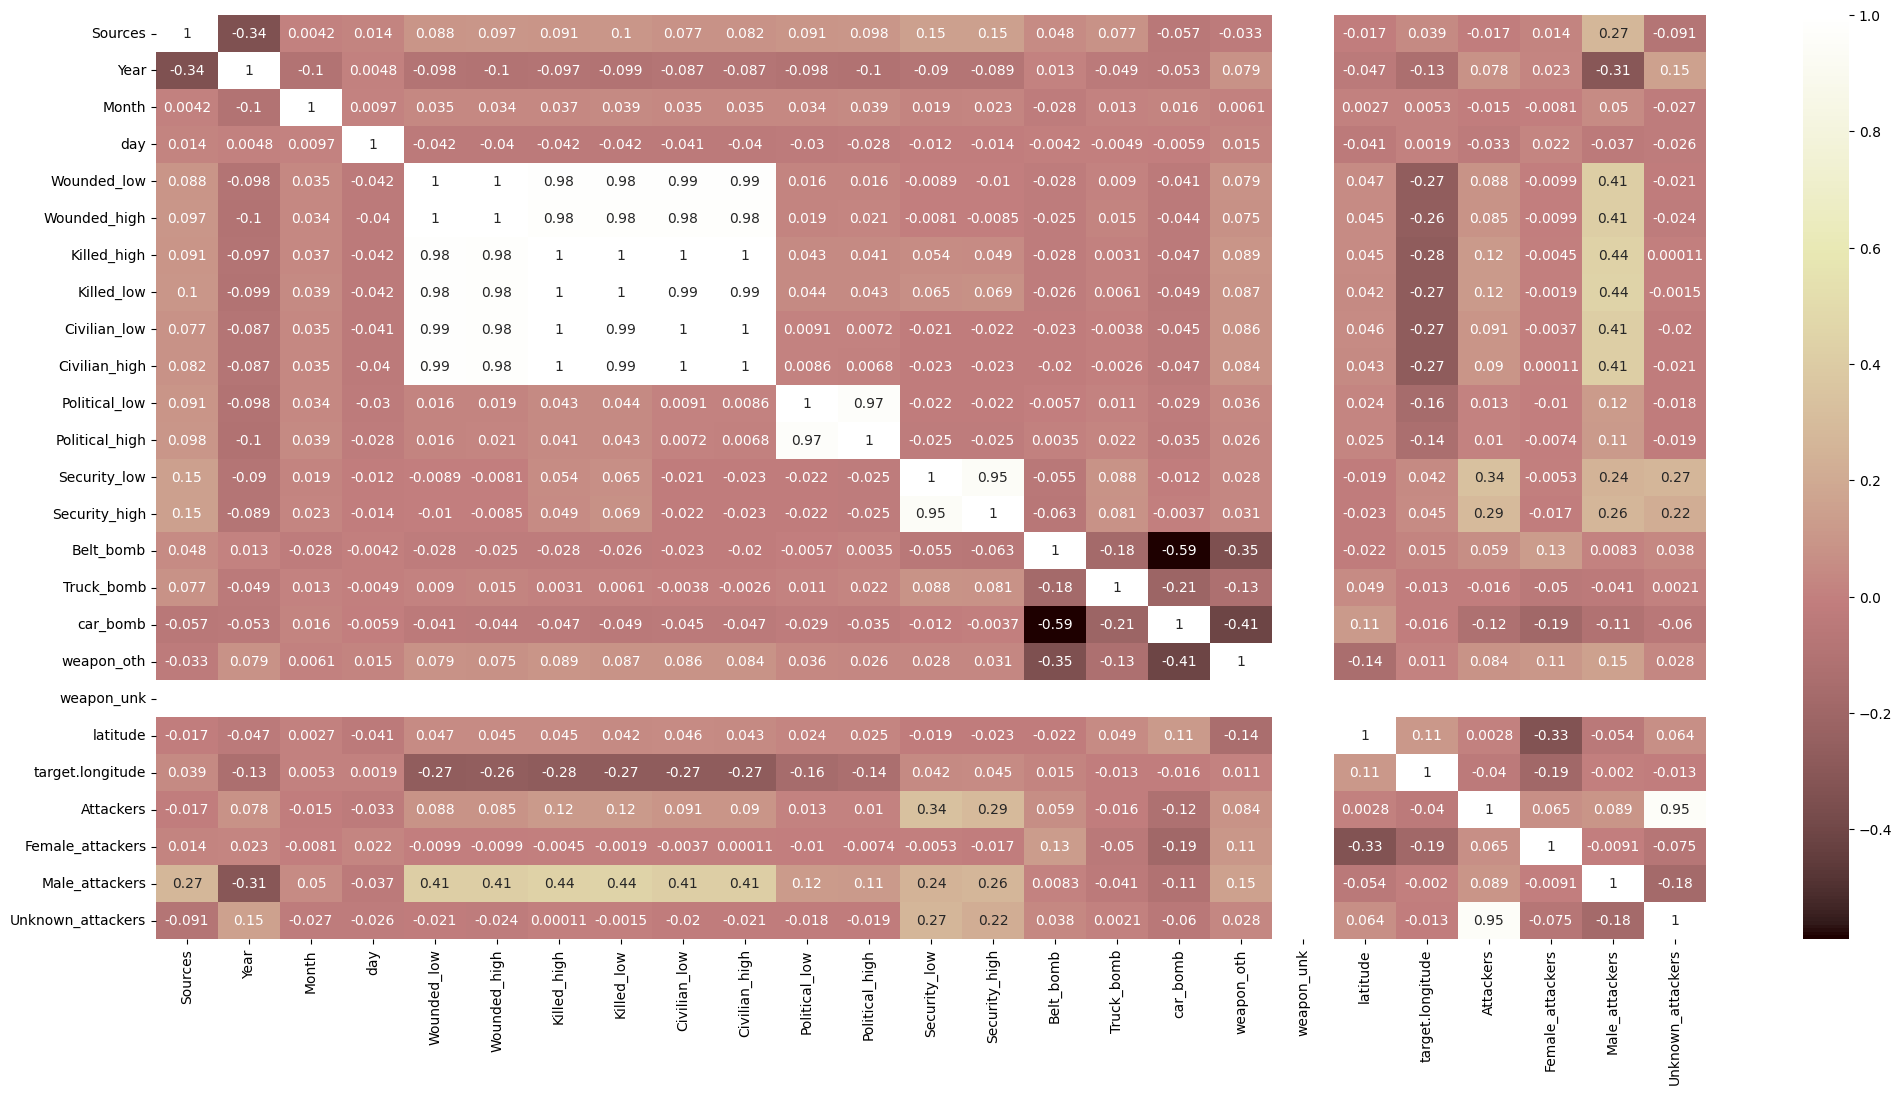

In [48]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(),annot=True,cmap='pink')
plt.plot()

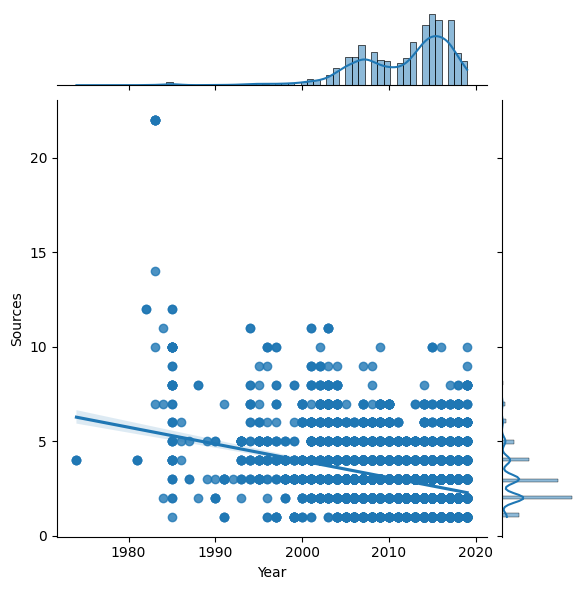

In [49]:
#jointplot measuring values
sns.jointplot(data=data,x='Year',y='Sources',kind='reg')
plt.show()


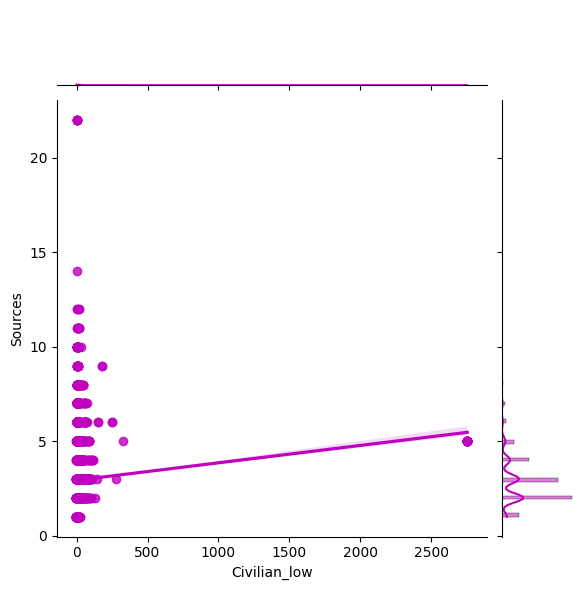

In [59]:
sns.jointplot(x='Civilian_low',y='Sources',data=data,kind='reg',color='m')
plt.show()

<ipython-input-56-7500ad249b47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


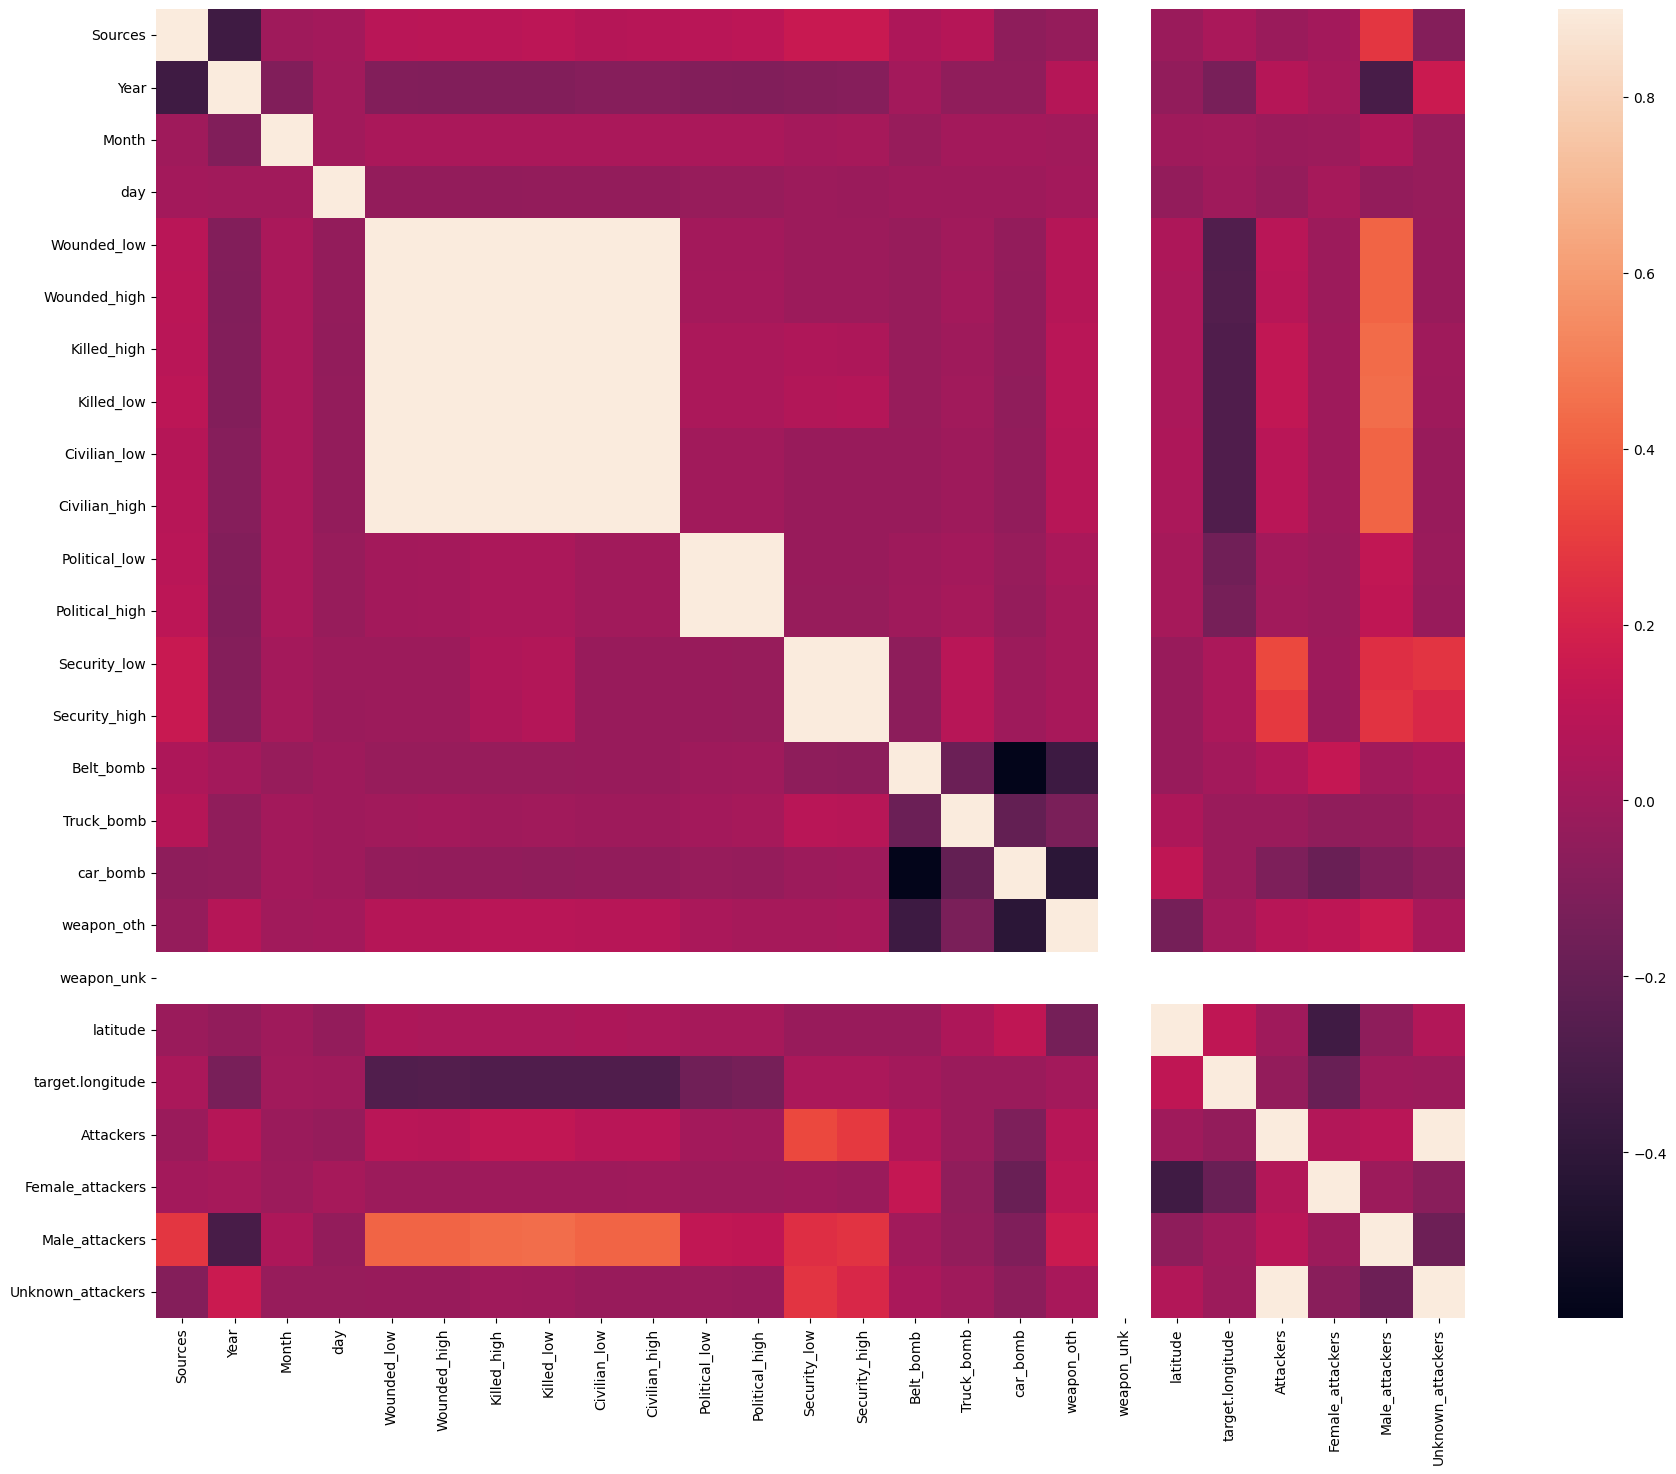

In [56]:
#Correlation coefficientt
#heatmap
plt.figure(figsize=(24,17))
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.9, square=True);
plt.show()


In [70]:
fig=px.bar(data.head(100), x="Attackers",y="Groups",color="Year",template="ggplot2")
fig.show()


In [71]:
fig=px.bar(data.head(100), x="Male_attackers",y="Groups",color="Year",template="ggplot2")
fig.show()


In [72]:
fig=px.bar(data.head(100), x="Female_attackers",y="Groups",color="Year",template="ggplot2")
fig.show()


In [75]:
#month wise Sources collection
fig = px.pie(data, values='Sources', names='Month')
fig.show()

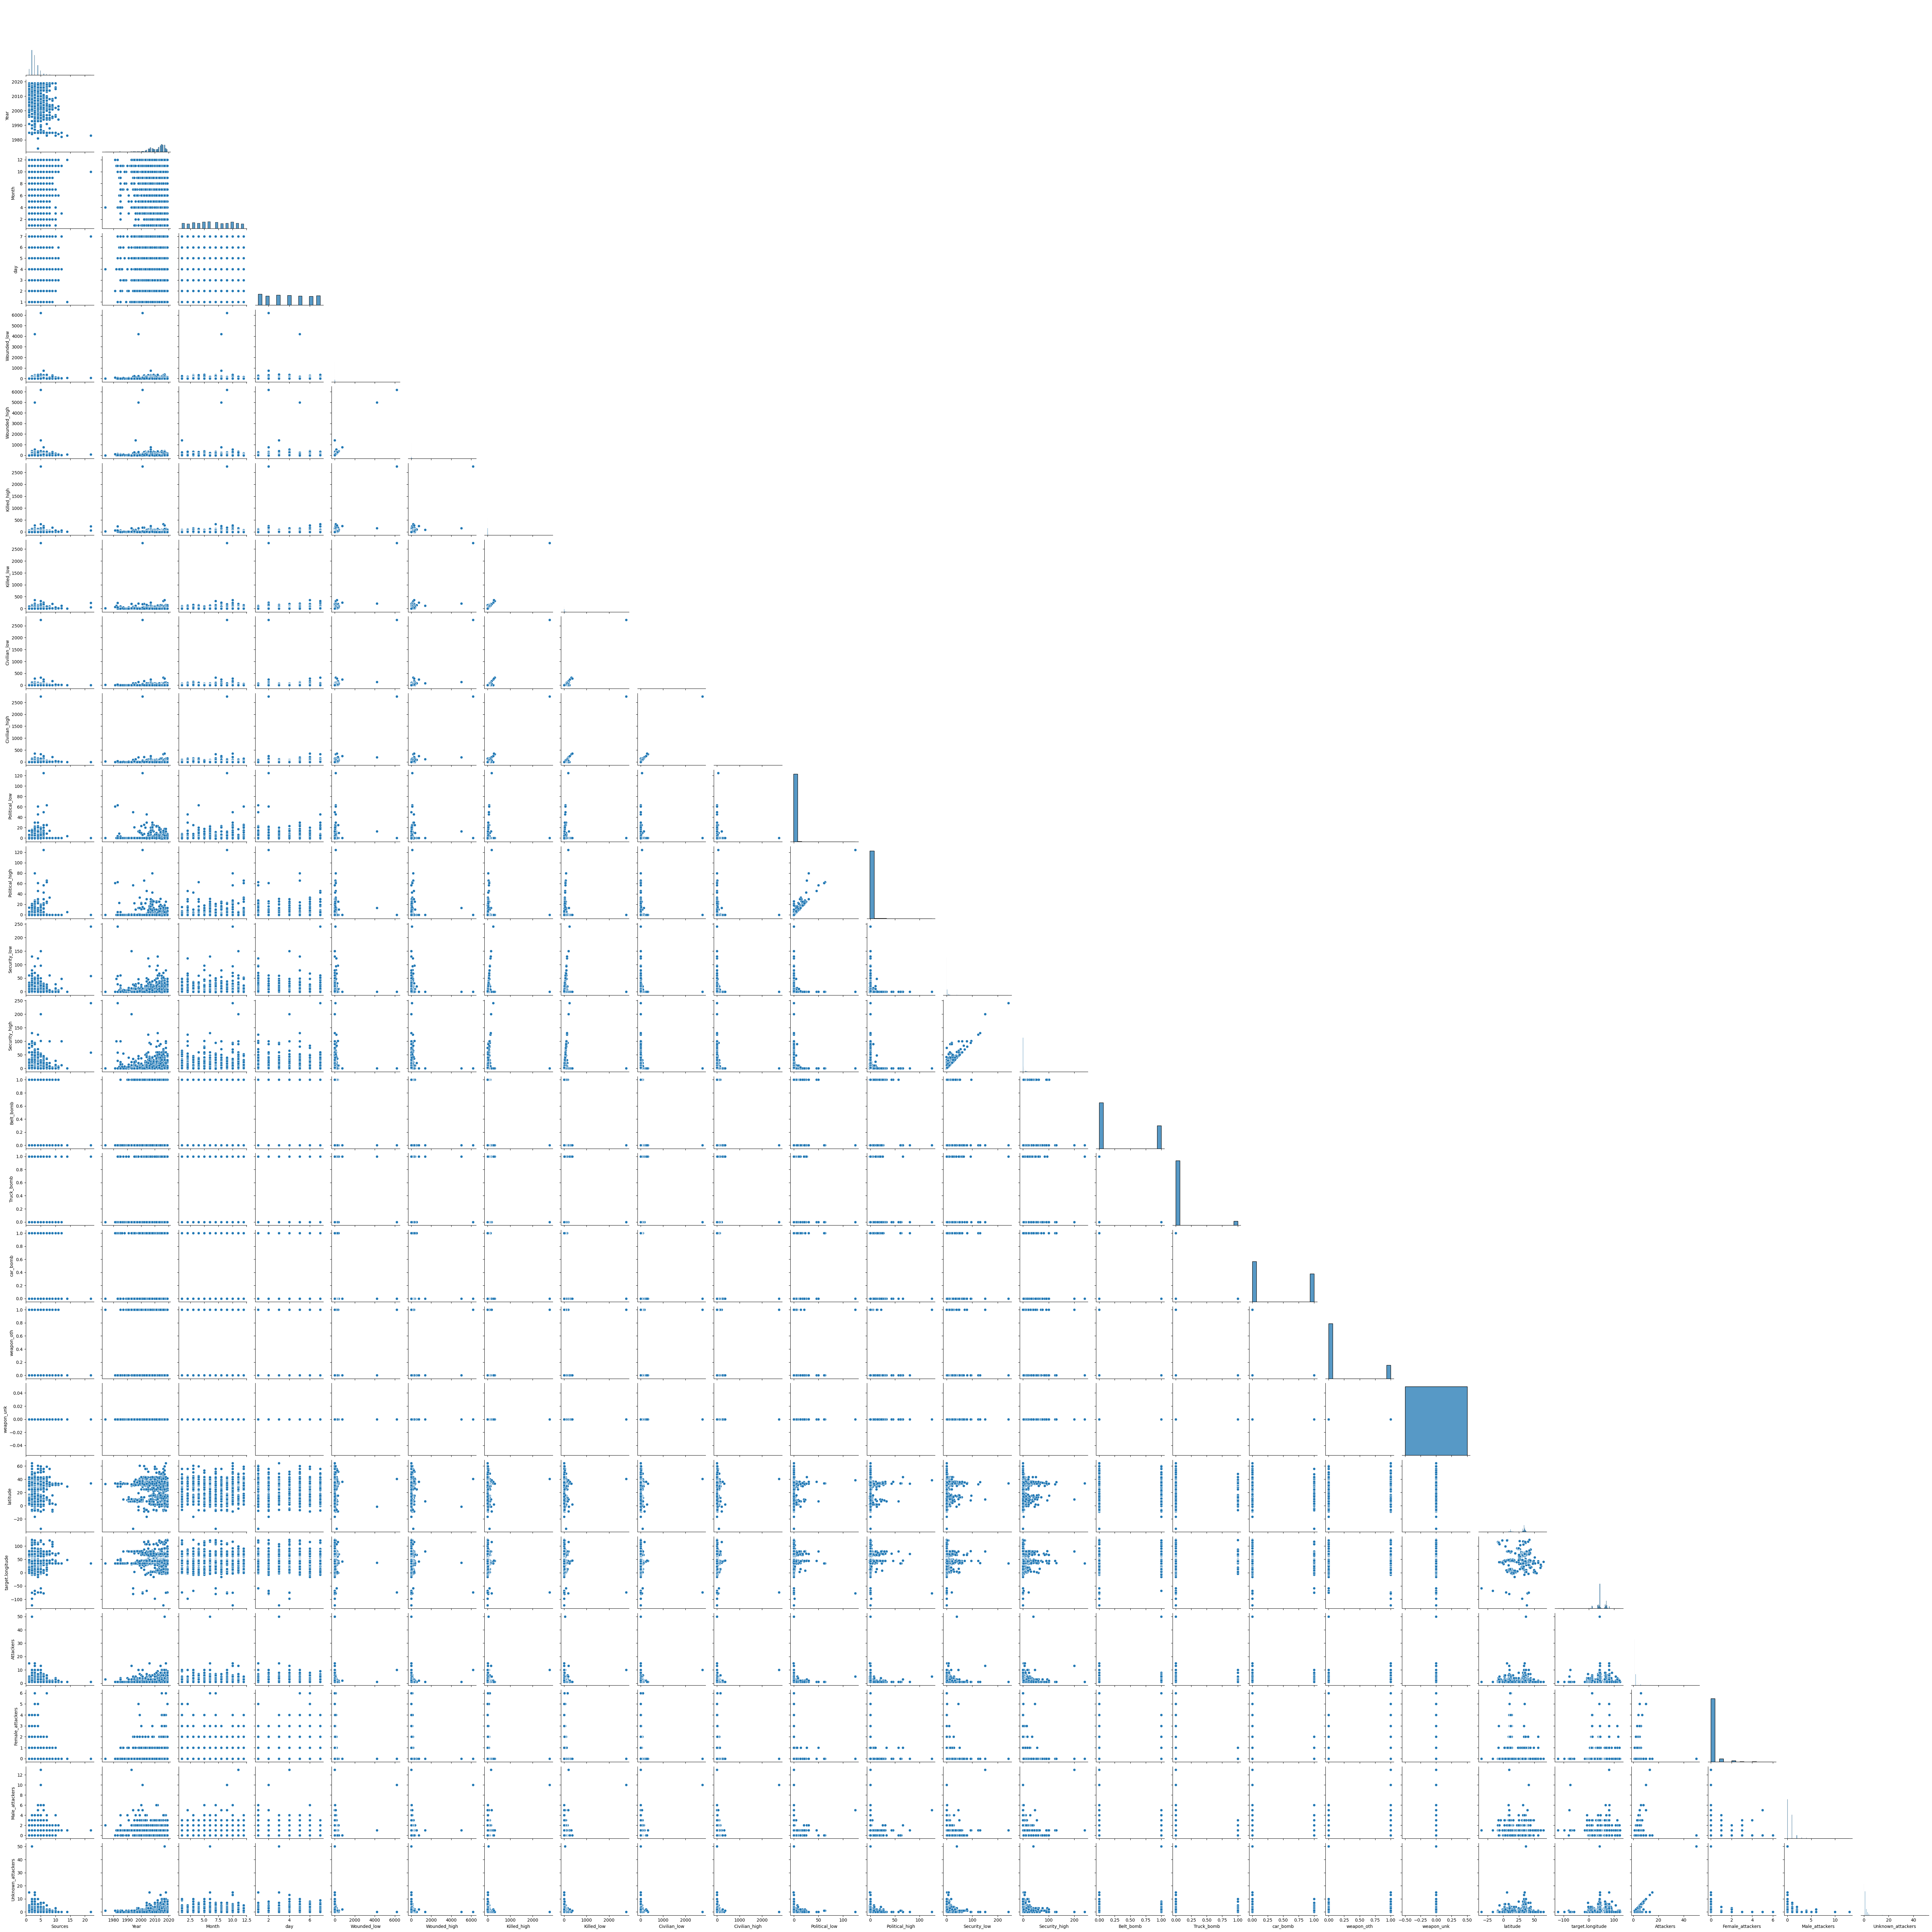

In [61]:
sns.pairplot(data,corner=True)
plt.show()

# Final overall prediction

In [81]:
mean=data.mean
mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                       Groups      Claim                          Status  \
0              Islamic State  Suspected               Confirmed Suicide   
1              Islamic State  Suspected      Possible - Too Few Sources   
2              Islamic State  Suspected      Possible - Too Few Sources   
3              Unknown Group  Unclaimed               Confirmed Suicide   
4              Taliban (IEA)    Claimed  Possible - Conflicting Reports   
...                      ...        ...                             ...   
10013          Unknown Group  Unclaimed      Possible - Too Few Sources   
10014  Islamic State of Iraq    Claimed      Possible - Too Few Sources   
10015  Islamic State of Iraq    Claimed      Possible - Too Few Sources   
10016          Unknown Group  Unclaimed               Confirmed Suicide   
10017          Unknown Group  Unclaimed               Confirmed Suicide   

       Sources  Year  Month  day  Wo

In [83]:
#Final Prediction overall percentage data in terrorism and Suicidal attacks
mean=data.mean
mean()

<ipython-input-83-d54ec6459b42>:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Sources                 2.941605
Year                 2011.567279
Month                   6.489419
day                     3.912358
Wounded_low            27.868137
Wounded_high           33.273009
Killed_high            13.015772
Killed_low             15.401677
Civilian_low            9.412158
Civilian_high          10.690357
Political_low           0.332302
Political_high          0.423937
Security_low            3.053005
Security_high           4.008385
Belt_bomb               0.331803
Truck_bomb              0.059693
car_bomb                0.410960
weapon_oth              0.197544
weapon_unk              0.000000
latitude               29.900553
target.longitude       47.620381
Attackers               2.025155
Female_attackers        0.129567
Male_attackers          0.594829
Unknown_attackers       1.300759
dtype: float64